### Link
- https://data.wprdc.org/dataset/property-assessments/resource/518b583f-7cc8-4f60-94d0-174cc98310dc

In [3]:
#import the required modules
import pandas as pd
import numpy as np
%matplotlib inline
import datetime

#import the data
data = pd.read_csv("Luke_dataset.csv")

#remove data that doesnt meet certian criteria
data = data[data['PROPERTYCITY'] == "PITTSBURGH"] 
data = data[data['SALEPRICE'] >= 10000] 
data = data[data['NEIGHDESC'] != ""] 
data = data[data['SALEDATE'] != ""] 


data.sample(5)

,PROPERTYCITY,PROPERTYSTATE,NEIGHCODE,NEIGHDESC,SALEDATE,SALEPRICE,NEIGHBORHOOD
519257,PITTSBURGH,PA,81904,81904,06-17-1996,61000.0,NaN
70974,PITTSBURGH,PA,11902,11902,04-02-2019,163000.0,NaN
269065,PITTSBURGH,PA,87601,BETHEL PARK,11-26-2002,110000.0,NaN
4453,PITTSBURGH,PA,61P21H,TOWER AT CHATHAM,09-05-2019,127000.0,NaN
304336,PITTSBURGH,PA,88006,PLUM BOROUGH,07-22-2019,130000.0,NaN


In [4]:
#convert date formats and get rid of more unnessecary data
def convert_to_year(dstr):
    return datetime.date(int(dstr.split("-")[2]), int(dstr.split("-")[0]), int(dstr.split("-")[1]))
def fix_desc(dstr):
    if(str(dstr).isdigit()):
        return "INVALID"
    return dstr
timeData = data
timeData['SALEDATE'] = timeData['SALEDATE'].apply(convert_to_year)
timeData['NEIGHDESC'] = timeData['NEIGHDESC'].apply(fix_desc)
timeData = timeData[timeData['NEIGHDESC'] != "INVALID"]

#define the dates that will be used as the bounds
cutoff1 = datetime.date(2010, 1, 1)
cutoff2 = datetime.date(2015, 1, 1)
cutoff3 = datetime.date(2020, 1, 1)

#split the list into a the before and after
data_old = timeData[timeData['SALEDATE'] >= cutoff1]
data_old = data_old[data_old['SALEDATE'] < cutoff2] 
values_old = data_old.groupby("NEIGHDESC")["SALEPRICE"].mean()
#values_old = values_old.sort_values()

data_new = timeData[timeData['SALEDATE'] >= cutoff2]
data_new = data_new[data_new['SALEDATE'] <= cutoff3]
values_new = data_new.groupby("NEIGHDESC")["SALEPRICE"].mean()
#values_new = values_new.sort_values()

In [9]:
data_old.sample(5)

,PROPERTYCITY,PROPERTYSTATE,NEIGHCODE,NEIGHDESC,SALEDATE,SALEPRICE,NEIGHBORHOOD
140586,PITTSBURGH,PA,56C38,SUBURBAN (SOUTH AND WEST OF PITTSBURGH),2013-07-10,132000.0,NaN
153657,PITTSBURGH,PA,81301,CASTLE SHANNON BOROUGH,2010-03-11,30000.0,NaN
128551,PITTSBURGH,PA,80102,ASPINWALL BOROUGH,2011-02-02,178846.0,NaN
571406,PITTSBURGH,PA,10301,CRAWFORD - ROBERTS,2010-10-04,150000.0,NaN
454757,PITTSBURGH,PA,95001,UPPER ST. CLAIR TOWNSHIP,2014-09-19,395000.0,NaN


In [10]:
data_new.sample(5)

,PROPERTYCITY,PROPERTYSTATE,NEIGHCODE,NEIGHDESC,SALEDATE,SALEPRICE,NEIGHBORHOOD
75909,PITTSBURGH,PA,51C78,PITTSBURGH URBAN,2018-06-14,150000.0,NaN
12714,PITTSBURGH,PA,51C28,PITTSBURGH URBAN,2015-03-18,350000.0,NaN
430505,PITTSBURGH,PA,94102,SCOTT TOWNSHIP,2017-08-31,135000.0,NaN
32227,PITTSBURGH,PA,51C44,PITTSBURGH URBAN,2016-03-14,2750000.0,NaN
353091,PITTSBURGH,PA,92606,MOUNT LEBANON TOWNSHIP,2015-12-29,203000.0,NaN


NEIGHDESC
IMPERIAL HOLDE                     8.674924e+04
SHADE EAST                         9.805000e+04
PENNHOUSE & GATEWAY TOWER          9.915961e+04
HIGHLAND COMMONS                   1.009473e+05
151 FIRST                          1.021663e+05
THE REGENCY                        1.033796e+05
SKYLINE &WINDOM HILL               1.224333e+05
4 COMPLEXES                        1.236252e+05
THE LOFTS                          1.256116e+05
1000 GRANDVIEW                     1.331662e+05
BEACON STREET                      1.382781e+05
FIRST AVENUE                       1.486667e+05
WARD 24 - TROY HILL                1.558835e+05
SHADYSIDE                          1.559814e+05
VILLAGE AT SHADYSIDE               1.595155e+05
BELLEFIELD                         1.779387e+05
STRIP LOFT                         1.877732e+05
POST WAR MUNI 107                  1.898065e+05
BEN AVON HEIGHTS                   2.195776e+05
WARD 22 - NORTH SHORE/ALLEGHENY    2.274137e+05
PIATT PLACE                   

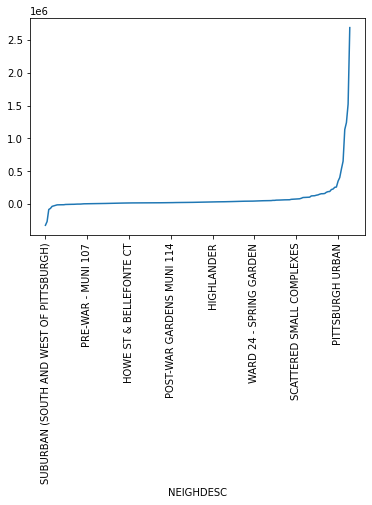

In [12]:
#calculate the list of how the property values have changed and get the highest ones
values_change = values_new-values_old
values_change = values_change.dropna()
values_change.sort_values().plot(kind='line',rot=90)
print(values_change.sort_values().tail(30))